In [19]:
from utils import parse_trajectory

In [20]:
file_path = "../test/traj.out"
traj_df = parse_trajectory(file_path)

In [21]:
traj_df.head()

,timestep,id,type,x,y,z,vx,vy,vz
0,0,1.0,1.0,-0.006349,-0.005596,0.002346,-0.012923,-0.011386,0.004772
1,0,2.0,1.0,0.001762,2.691324,2.695381,0.003580,-0.002395,0.005864
2,0,3.0,1.0,2.684927,0.004321,2.689694,-0.015410,0.008794,-0.005711
3,0,4.0,1.0,2.689582,2.695463,0.004130,-0.005940,0.006024,0.008404
4,0,5.0,1.0,-0.001028,-0.003422,5.393472,-0.002094,-0.006967,0.017244


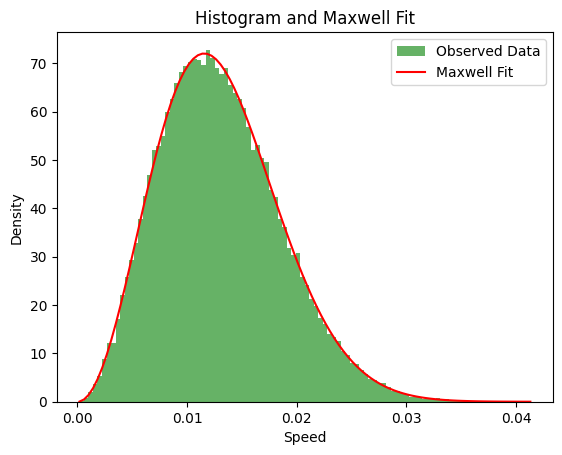

KS Statistic: 0.002926712821151145
P-value: 0.44900074468604223
The data is likely to follow a Maxwell distribution (fail to reject H0).


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import maxwell, kstest

# Step 1: Calculate speeds from trajectory DataFrame
traj_df["speed"] = np.sqrt(traj_df["vx"] ** 2 + traj_df["vy"] ** 2 + traj_df["vz"] ** 2)

# Step 2: Create a histogram of speeds
speeds = traj_df["speed"].values

# 1. Plot histogram of speeds
plt.hist(speeds, bins=100, density=True, alpha=0.6, color="g", label="Observed Data")

# Fit the Maxwell distribution
params = maxwell.fit(speeds)
x = np.linspace(speeds.min(), speeds.max(), 100)
pdf_fitted = maxwell.pdf(x, *params)

# Plot the fitted Maxwell distribution
plt.plot(x, pdf_fitted, "r-", label="Maxwell Fit")
plt.xlabel("Speed")
plt.ylabel("Density")
plt.legend()
plt.title("Histogram and Maxwell Fit")
plt.savefig("Maxwell_Fit.png", dpi=300, bbox_inches="tight")
plt.show()

# 2. Perform Kolmogorov-Smirnov test
ks_stat, p_value = kstest(speeds, "maxwell", args=params)

print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value > 0.05:
    print("The data is likely to follow a Maxwell distribution (fail to reject H0).")
else:
    print("The data does not follow a Maxwell distribution (reject H0).")